In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from imutils import paths
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras 
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten, Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [3]:
data_directory ='E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/'

In [4]:
train_dir= 'E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Train/'
len(os.listdir(train_dir))
# Therefore there are 42 classes present in Training dataset 

43

In [5]:
dic={}
for i in os.listdir(train_dir):
    train_class = len(os.listdir(train_dir+'/'+i))
    dic[int(i)] =  train_class
    
dic = dict(sorted(dic.items()))
print(dic)

{0: 210, 1: 2220, 2: 2250, 3: 1410, 4: 1980, 5: 1860, 6: 420, 7: 1440, 8: 1410, 9: 1470, 10: 2010, 11: 1320, 12: 2100, 13: 2160, 14: 780, 15: 630, 16: 420, 17: 1110, 18: 1200, 19: 210, 20: 360, 21: 330, 22: 390, 23: 510, 24: 270, 25: 1500, 26: 600, 27: 240, 28: 540, 29: 270, 30: 450, 31: 780, 32: 240, 33: 689, 34: 420, 35: 1200, 36: 390, 37: 210, 38: 2070, 39: 300, 40: 360, 41: 240, 42: 240}


In [6]:
sum(dic.values())

39209

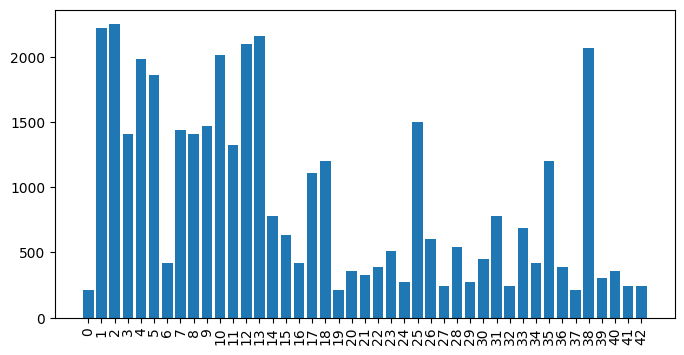

In [7]:
plt.figure(figsize=(8,4))
plt.bar(dic.keys(),dic.values())
plt.xticks(np.arange(0,43,1),rotation = 'vertical')
plt.show()

In [9]:
image_data = []
image_label = []

data_path = "E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Train/"
for i in os.listdir(train_dir):

    for j in os.listdir(train_dir + '/' + str(i)):

        path = "E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Train/" + str(i) + "/" + j

        img = cv2.imread(path)
        img = Image.fromarray(img, 'RGB').resize((64, 64))
        img = np.array(img)

        image_data.append(img)
        image_label.append(i)
        
image_data_64 = np.array(image_data)
image_label_64 = np.array(image_label)

In [10]:
x_train,x_val,y_train,y_val = train_test_split(image_data_64, image_label_64,test_size=0.2,random_state=10,stratify=image_label)

In [11]:
pd.DataFrame(y_val).value_counts()

2     450
1     444
13    432
12    420
38    414
10    402
4     396
5     372
25    300
9     294
7     288
3     282
8     282
11    264
18    240
35    240
17    222
14    156
31    156
33    138
15    126
26    120
28    108
23    102
30     90
16     84
6      84
34     84
36     78
22     78
20     72
40     72
21     66
39     60
29     54
24     54
41     48
42     48
32     48
27     48
37     42
19     42
0      42
dtype: int64

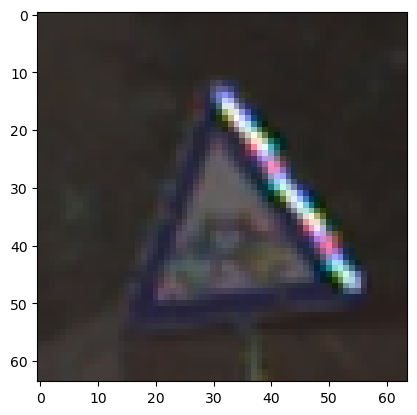

In [12]:
plt.imshow(x_train[0])

In [13]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.10,
    zoom_range=0.15,
    fill_mode='nearest')

In [14]:
# doing onehot encoding of output 
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

x_train = x_train/255
x_val = x_val/255

In [15]:
x_train.shape

(31367, 64, 64, 3)

In [16]:
y_train.shape

(31367, 43)

In [17]:
x_val.shape

(7842, 64, 64, 3)

In [18]:
y_val.shape

(7842, 43)

In [19]:
#ImageDataGenerator()

In [20]:
# Model building 

In [21]:
test_img_data = []

test_path = "E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Test/"
os.listdir(test_path)

for i in os.listdir(test_path):

    path = test_path + i
    img = cv2.imread(path)
    img = Image.fromarray(img, 'RGB').resize((64, 64))
    img = np.array(img)

    test_img_data.append(img)
    #There could be error bcoz of the a excel file present in the test directory 
    #before runing this code make sure there is no other files except .png files  
    
test_img_data = np.array(test_img_data)
test_img_data = test_img_data/255

In [23]:
test_df = pd.read_csv(r'E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Test.csv')
test_class = np.array(test_df['ClassId'])

In [24]:
test_img_data.shape

(12630, 64, 64, 3)

In [25]:
test_class[:100]

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35, 12,  7, 23,  7,  4,  9, 21,
       20, 27, 38,  4, 33,  9,  3,  1, 11, 13, 10,  9, 11,  5, 17, 34, 23,
        2, 17,  3, 12, 16,  8,  7, 30, 18, 12, 24, 25,  3, 10, 18,  8, 25,
       13, 15,  9, 13, 35,  5, 26,  9, 16, 38, 10,  4,  9, 15,  9, 26,  2,
        5, 28, 11, 25, 30, 34,  5, 12,  1, 10, 25, 25, 21, 33, 25,  7, 10,
       35,  3,  7, 22, 13,  3,  1,  2, 14, 12, 32,  3, 38,  9, 33],
      dtype=int64)

## Transfer Learning (VGG 16 Architecture)

In [26]:
vgg16 = VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)

for layer in vgg16.layers:
    layer.trainable = False

add_model = Sequential()
add_model.add(Flatten(input_shape=vgg16.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))

add_model.add(Dense(512, activation='relu'))

add_model.add(Dense(y_train.shape[1], activation='softmax'))

model_vgg16 = Model(inputs=vgg16.input, outputs=add_model(vgg16.output))

learning_rate = 0.0001
def results(model):
    adam = Adam(lr=learning_rate)

    
model_vgg16.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model_vgg16.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [27]:
epochs = 20
history = model_vgg16.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=5,
validation_data=(x_val, y_val))

Epoch 1/5
246/246 [==============================] - 391s 2s/step - loss: 1.5028 - accuracy: 0.5312 - val_loss: 0.9469 - val_accuracy: 0.6954
Epoch 2/5
246/246 [==============================] - 416s 2s/step - loss: 0.8516 - accuracy: 0.7202 - val_loss: 0.6260 - val_accuracy: 0.7950
Epoch 3/5
246/246 [==============================] - 419s 2s/step - loss: 0.6616 - accuracy: 0.7816 - val_loss: 0.5259 - val_accuracy: 0.8247
Epoch 4/5
246/246 [==============================] - 414s 2s/step - loss: 0.5399 - accuracy: 0.8198 - val_loss: 0.4339 - val_accuracy: 0.8596
Epoch 5/5
246/246 [==============================] - 421s 2s/step - loss: 0.4578 - accuracy: 0.8467 - val_loss: 0.3824 - val_accuracy: 0.8727


In [28]:
y_pred_prob = model_vgg16.predict(test_img_data)
y_pred = np.argmax(y_pred_prob,axis=-1)

395/395 [==============================] - 142s 359ms/step


In [29]:
accuracy_vgg16 = accuracy_score(test_class,y_pred)

In [30]:
print(f"VGG16 model Accuracy score : {accuracy_vgg16}")

VGG16 model Accuracy score : 0.6602533650039588


In [31]:
test_img_data

array([[[[0.67843137, 0.54117647, 0.45098039],
         [0.6745098 , 0.54117647, 0.45490196],
         [0.66666667, 0.5372549 , 0.45490196],
         ...,
         [0.51764706, 0.41960784, 0.32941176],
         [0.46666667, 0.37254902, 0.29411765],
         [0.4       , 0.30980392, 0.23529412]],

        [[0.69411765, 0.55686275, 0.4627451 ],
         [0.69019608, 0.54901961, 0.45882353],
         [0.68235294, 0.54509804, 0.45098039],
         ...,
         [0.63529412, 0.5254902 , 0.44313725],
         [0.61568627, 0.50588235, 0.42745098],
         [0.6       , 0.49019608, 0.41568627]],

        [[0.69803922, 0.56078431, 0.45882353],
         [0.69019608, 0.54901961, 0.45098039],
         [0.68235294, 0.54509804, 0.44705882],
         ...,
         [0.6745098 , 0.55686275, 0.4745098 ],
         [0.6627451 , 0.54901961, 0.47058824],
         [0.6745098 , 0.54901961, 0.4745098 ]],

        ...,

        [[0.65490196, 0.53333333, 0.45098039],
         [0.64705882, 0.53333333, 0.45098039]

## Transfer learning(ResNet 50 Architecture)

In [ ]:
resnet_50 = keras.applications.resnet50.ResNet50(input_shape=(64,64,3), weights='imagenet', include_top=False)

for layer in resnet_50.layers:
    layer.trainable = False

add_model = Sequential()
add_model.add(Flatten(input_shape=resnet_50.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))

add_model.add(Dense(512, activation='relu'))

add_model.add(Dense(y_train.shape[1], activation='softmax'))

model_resnet_50 = Model(inputs=resnet_50.input, outputs=add_model(resnet_50.output))

learning_rate = 0.0001
def results(model):
    adam = Adam(lr=learning_rate)

    
model_resnet_50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model_resnet_50.summary()

In [ ]:
epochs = 20
with tf.device('/GPU:0'):
    history = model_resnet_50.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=epochs,
    validation_data=(x_val, y_val))

In [ ]:
y_pred_prob = model_resnet_50.predict(test_img_data)
y_pred = np.argmax(y_pred_prob,axis=-1)

In [ ]:
accuracy_resnet50 = accuracy_score(test_class,y_pred)

In [ ]:
print(f"Resnet50 model Accuracy score : {accuracy_resnet50}")

## Transfer Learning (InceptionV3)

In [ ]:
inc_v3 = keras.applications.inception_v3.InceptionV3(input_shape=(64,64,3), weights='imagenet', include_top=False)

for layer in inc_v3.layers:
    layer.trainable = False
    
add_model = Sequential()
add_model.add(Flatten(input_shape=inc_v3.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))

add_model.add(Dense(512, activation='relu'))

add_model.add(Dense(y_train.shape[1], activation='softmax'))

model_inc_v3 = Model(inputs=inc_v3.input, outputs=add_model(inc_v3.output))

learning_rate = 0.0001
def results(model):
    adam = Adam(lr=learning_rate)

    
model_inc_v3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model_inc_v3.summary()

In [ ]:
epochs = 20
with tf.device('/GPU:0'):
    history = model_inc_v3.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=epochs,
    validation_data=(x_val, y_val))

In [ ]:
y_pred_prob = model_inc_v3.predict(test_img_data)
y_pred = np.argmax(y_pred_prob,axis=-1)

In [ ]:
accuracy_inc_v3 = accuracy_score(test_class,y_pred)

In [ ]:
print(f"InceptionV3 Model Accuracy score : {accuracy_inc_v3}")

## Transfer Learning (EfficientNetB0)

In [ ]:
eff_net_b0 = keras.applications.efficientnet.EfficientNetB0(input_shape=(64,64,3), weights='imagenet', include_top=False)


for layer in eff_net_b0.layers:
    layer.trainable = False
    
    
    
add_model = Sequential()
add_model.add(Flatten(input_shape=eff_net_b0.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))

add_model.add(Dense(512, activation='relu'))

add_model.add(Dense(y_train.shape[1], activation='softmax'))

model_eff_net_b0 = Model(inputs=eff_net_b0.input, outputs=add_model(eff_net_b0.output))

learning_rate = 0.0001
def results(model):
    adam = Adam(lr=learning_rate)

    
model_eff_net_b0.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model_eff_net_b0.summary()

In [ ]:
epochs = 20
with tf.device('/GPU:0'):
    history = model_eff_net_b0.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=epochs,
    validation_data=(x_val, y_val))

In [ ]:
y_pred_prob = model_eff_net_b0.predict(test_img_data)
y_pred = np.argmax(y_pred_prob,axis=-1)

In [ ]:
accuracy_eff_net_b0 = accuracy_score(test_class,y_pred)

In [ ]:
print(f"EfficientNetB0 Model Accuracy score : {accuracy_eff_net_b0}")

## Transfer Learning (MobileNetV2)

In [ ]:
mob_net_v2 = keras.applications.mobilenet_v2.MobileNetV2(input_shape=(64,64,3), weights='imagenet', include_top=False)


for layer in mob_net_v2.layers:
    layer.trainable = False
    
    
add_model = Sequential()
add_model.add(Flatten(input_shape=mob_net_v2.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))

add_model.add(Dense(512, activation='relu'))

add_model.add(Dense(y_train.shape[1], activation='softmax'))

model_mob_net_v2 = Model(inputs=mob_net_v2.input, outputs=add_model(mob_net_v2.output))

learning_rate = 0.0001
def results(model):
    adam = Adam(lr=learning_rate)

    
model_mob_net_v2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model_mob_net_v2.summary()

In [ ]:
epochs = 20
with tf.device('/GPU:0'):
    history = model_mob_net_v2.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=epochs,
    validation_data=(x_val, y_val))

In [ ]:
accuracy_mob_net_v2 = accuracy_score(test_class,y_pred)

In [ ]:
print(f"MobileNetB0 Model Accuracy score : {accuracy_mob_net_v2}")

## Transfer Learning (DenseNet121)

In [ ]:
dense_net_121 = keras.applications.densenet.DenseNet121(input_shape=(64,64,3), weights='imagenet', include_top=False)


for layer in dense_net_121.layers:
    layer.trainable = False
    
    
add_model = Sequential()
add_model.add(Flatten(input_shape=dense_net_121.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))

add_model.add(Dense(512, activation='relu'))

add_model.add(Dense(y_train.shape[1], activation='softmax'))

model_dense_net_121 = Model(inputs=dense_net_121.input, outputs=add_model(dense_net_121.output))

learning_rate = 0.0001
def results(model):
    adam = Adam(lr=learning_rate)

    
model_dense_net_121.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model_dense_net_121.summary()

In [ ]:
epochs = 20
with tf.device('/GPU:0'):
    history = model_dense_net_121.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=epochs,
    validation_data=(x_val, y_val))

In [ ]:
accuracy_dense_net_121 = accuracy_score(test_class,y_pred)

In [ ]:
print(f"DenseNet121 Model Accuracy score : {accuracy_dense_net_121}")

## Visualizing all the transfer learning model accuracies

In [ ]:
result_df = pd.DataFrame({'Transfer_Learning_Models':['VGG16','Resnet50','Inception_V3','EfficientNetB0','MobileNetV2','DenseNet121'],
                                          'Accuracies' : [accuracy_vgg16,accuracy_resnet50,
                                                          accuracy_eff_net_b0,accuracy_mobile_net_v2,
                                                          accuracy_dense_net_121]}
result_df

## Custom Model

In [ ]:
DEMO

In [ ]:
model1 = Sequential([
    Conv2D(filters=64,kernel_size=[5,5],activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=[3,3],activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(43,activation='softmax')  
])

model1.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model1.fit(datagen.flow(x_train, y_train, batch_size=128),epochs=12,validation_data = (x_val,y_val))

In [ ]:
y_pred = model1.predict(x_val)

In [ ]:
model1.summary()

In [ ]:
# model1.save('road_sign_detection')

In [ ]:
ss = keras.models.load_model(r'D:\anaconda3\My_Projects\NORTHEASTERN UNIVERSITY (ASSIGNMENTS & OTHER WORK)\SML\Untitled Folder\road_sign_detection')
ss.summary()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

pd.DataFrame(classification_report(y_val.argmax(axis=-1),y_pred.argmax(axis=-1),output_dict = True)).transpose()

In [ ]:
### Testing Data 

In [ ]:
test_img_data = []

test_path = "E:/Northeastern Grad Studies/Fall 22 - Semester 1/SML - Prof. Honyang Zang/german_roadsign/Test/"
os.listdir(test_path)

for i in os.listdir(test_path):

    path = test_path+ i
    
    img = cv2.imread(path)
    img = Image.fromarray(img, 'RGB').resize((64, 64))
    img = np.array(img)

    test_img_data.append(img)
    #There could be error bcoz of the a excel file present in the test directory 
    #before runing this code make sure there is no other files except .png files  
    
test_img_data = np.array(test_img_data)
test_img_data = test_img_data/255

In [ ]:
test_df = pd.read_csv(r'E:\Northeastern Grad Studies\Fall 22 - Semester 1\SML - Prof. Honyang Zang\german_roadsign\Test.csv')
test_class = np.array(test_df['ClassId'])

In [ ]:
y_pred_prob = model1.predict(test_img_data)
y_pred = np.argmax(y_pred_prob,axis=-1)

In [ ]:
accuracy_score(test_class,y_pred)

In [ ]:
pd.DataFrame(classification_report(test_class,y_pred, output_dict = True)).transpose()

In [ ]:
## Work on this 

#train_datagen = 
ImageDataGenerator(rescale=1./255)